# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
# Read the mouse data and the study results
mousedata = pd.read_csv('/users/menard/desktop/Pymaceuticals-Challenge/Resources/Mouse_metadata.csv')
studydata = pd.read_csv('/users/menard/desktop/Pymaceuticals-Challenge/Resources/Study_results.csv')

# Combine the data into a single dataset
data = pd.merge(mousedata,studydata, how='outer',on=['Mouse ID','Mouse ID'])

# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
uniqueid = data['Mouse ID'].value_counts()
mousecount = len(uniqueid)
mousecount

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# In order to get the duplicate by Mouse ID that shows up for Mouse ID and Timepoint
# We will need to create a new dataframe that is referencing the merged data (data). From that merged
# data we want to get the duplicate(s) that have similar mouse ID and timepoint. To do so, we will use
# the loc function to specify the two columns. In reference to data we then want to get the duplicates
# within the two columns that the loc function is referencing. 

# Note that the subset is close along with the duplicates function. The loc, is still open hence we 
# want to look at the unique Mouse ID's column within the Mouse ID column
duplicates = data.loc[data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# NOTE that the output is 'array(['g989'], dtype=object)' rather than printing the rows and columns
# this is because it is in a numpy array format. This is caused by the '.unique()' function that we
# we used to get the duplicates. In order to show a simpler/much easier to read visual we will need
# to convert the dataframe to pandas so pandas can create our visual for easier analysis.

# The next steps in changing the format is to create a pandas dataframe and using the pd.DataFrame 
# method refrencing the numpy dataset from the duplicates

dupe = pd.DataFrame(duplicates)
dupe

# In order to show all of the duplicates in pandas, we will need to create a mask which we will then
# use to refrence in the original merged dataset to list all the values that equal the mask. The mask
# will act as our boolean rather than doing a loop boolean throughout the whole dataframe.

# Now that we converted 'dupe' to a pandas dataframe we will redefine the variable to list the number
# of rows matches the mask.

# We will reuse 'dupe' in referennce to the original merged dataframe (similar to the code above but
# instead of stating which mouse ID is the dupe we want to list it). We want to look within the subset
# or columns 'Mouse ID' and 'Timepoint' we want to keep = False because we want ALL the occurances
# of duplicates that matches the mask to be returned.

dupe = data[data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# We are creating a mask to be our boolean when reading the 'Mouse ID' column.
mask = 'g989'
# The final step is to create a new dataframe in reference to dupe (which has our duplicates) and we
# want to look into the column 'Mouse ID' within the dupe dataframe. We want to look into that specific
# column to match our mask. If variables do match our mask then we want it to be listed. Hence the 
# 'keep=False'
duplicate_data = dupe[dupe['Mouse ID'] == mask]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# To remove the duplicates we would need to create a new dataframe.
# The code below is saying, using the original merged csv's as reference (data) we want to look at
# the 'Mouse ID' column within the original (data['Mouse ID']). The 'isin' method checks if the values
# within the Mouse ID column are present within the duplicates (g989). The output will be a boolean 
# because it is either found in the Mouse ID column or not. We are using '==False' because we are 
# selecting the rows where values that are not in the duplicates dataset (g989). In shorter terms
# the False is used to exclude the duplicate mouse IDs from the clean dataframe.
cleaned = data[data['Mouse ID'].isin(duplicates)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean = cleaned['Mouse ID'].value_counts()
cleandf = len(clean)
cleandf

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# To generate a summary statistic table of the measures of tendencies we first need to start backwards,
# in order to create the measures of tendecies for the Tumor Volume we would need to first group the
# dataset by 'Drug Regimen' which are the drugs used and the text we will see within the table and the
# statistical measures will be the 'Tumor Volume. This is laying the ground (defining variables) in 
# creating a table

# Only downside for this is that it will only print out the last code which is SEM.
groupavg = cleaned.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
groupavg

groupmed = cleaned.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
groupmed

groupvar = cleaned.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
groupvar

groupstd = cleaned.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
groupstd

groupsem = cleaned.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
groupsem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [9]:
summary = pd.DataFrame({"Mean": groupavg,
                       "Median": groupmed,
                       "Variance": groupvar,
                       "Standard Deviation": groupstd,
                       "Standard Error": groupsem})
summary

# We are grouping the dataset by the 'Drug Regimen' column and we want to apply the measures of 
# tendencies for the 'Tumor Volume (mm3)'. Once we have the groundwork we then want to use the
#'agg' method. This method calculates the specified statistics per group and returns the results as 
# dataframe in reference to the index (['Tumor Volume'])
# NOTE: the 'Tumor Volume' is inside brackets because we want to use that column as our index, while
# we group the two by 'Drug Regimen'. This not only looks cleaner but makes it the dataset easier to visualize.
summary_stats = cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

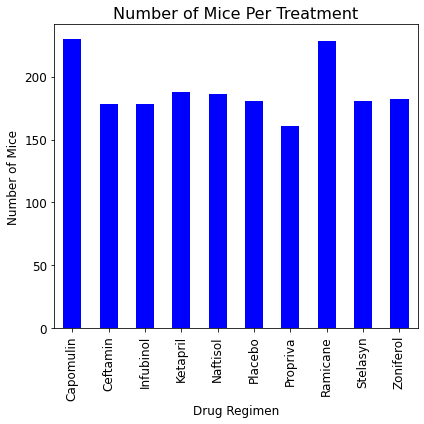

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug 
# regimen using Pandas.

# In order to do what is being asked. We first need to get the total number of mice within the dataset
# to do this we will create a new dataframe to hold the number of mice. We are grouping the number of 
# mice with the drug regimen because we want to see how many mice has been under x drug regimen.
# Therefore, we will reference the orginal merged dataset (data) and group the count of unique mice ID with 
# the drug regimen (.groupby['Drug Regimen'].count()['Mouse ID'])
micetestpd = data.groupby(['Drug Regimen']).count()['Mouse ID']
# Once that we have grouped the number of mice per drug regimen we can now plot the bar graph. 
# We want to plot the micetest dataframe (# of mic per regimen) into a bar graph (plot.bar) with a 
# size of (6,6), color = blue and font size of 12
miceplot = micetestpd.plot.bar(figsize = (6,6), color='b', fontsize=12)
# Once plotted we then want to put in our labels with the desired font.
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Number of Mice', fontsize=12)
plt.title('Number of Mice Per Treatment', fontsize=16)

plt.tight_layout()
plt.show
# For more details we will print out the number of mice per regimen.
micetestpd

plt.savefig('/users/menard/desktop/Pymaceuticals-Challenge/Images/Number Of Mice Per Treatment Pandas.png', bbox_incehs='tight')

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# In order to use pyplot we must turn our dataframe into a list. In doing so we will create a new dataframe
# in reference to the original merged dataframe and the number of mice with the drug regimen. We will
# then use the 'tolist' function to convert it into a list

micetestplt = (data.groupby(['Drug Regimen'])['Mouse ID'].count()).tolist()
micetestplt

# NOTE that the same values as above is showing below. This is because we are just converting the 
# mousetestpd into a list for graphing using pyplot. Think of this as a verification that the numbers 
# below are the same as above for accuracy.

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

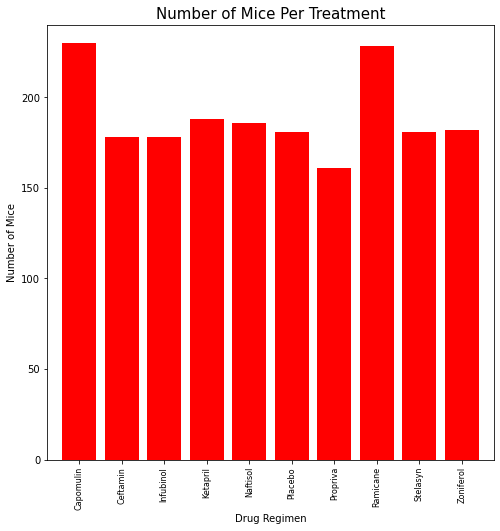

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug 
# regimen using pyplot.

# Similar concept as above just a bit different. We want to set our x-axis the legnth of how many
# integers the list (miceplt) has.
xaxis = np.arange(len(micetestplt))
# We HAVE to make a fig, statement because if we don't it will overwrite and rewrite the chart above
# We don't want that as it is measuring the same thing and will have the same results. We are using a 
# different method. We will use subplots and configure our figure size for our pyplot chart.
fig1, chart1=plt.subplots(figsize=(8,8))
# We then want to do a bar graph with the x axis being the number of integers are within the micetesplt
# list, our y-axis will be the number of mice which is 'micetestplt', color is set to red and aligned
# in the center.
plt.bar(xaxis, micetestplt, color='r', align='center')

# Once we have our plot, we then want to add the finishing touches. That being the tick marks, rotation
# labels and the amount of space to make the chart less crowded.
# NOTE that if we leave the x-axis to just be the length it will only show up as numbers vs the text
# in which which drug regimen was used. To bypass this we will have to individually name the drugs listed
# BE CAREFUL AS THE NAMING SHOULD BE THE SAME AS THE RESULTS SHOWN ABOVE.
chart1.set_xticks(xaxis)
chart1.set_xticklabels(['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva',
'Ramicane','Stelasyn','Zoniferol'],fontsize = 8, rotation=90)
# Plotting our limits so the chart can fit within the given space
plt.xlim(-0.75,len(xaxis)-.25)
plt.ylim(0,max(micetestplt)+10)
# Lastly, labeling the axis and title
plt.title('Number of Mice Per Treatment',fontsize=15)
plt.xlabel('Drug Regimen',fontsize=10)
plt.ylabel('Number of Mice',fontsize=10)

plt.savefig('/users/menard/desktop/Pymaceuticals-Challenge/Images/Number Of Mice Per Treatment PyPlot.png', bbox_incehs='tight')

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# In order to generate a pi chart we first need to convert the values to percentages. But before we can
# convert them into percentages we first must group the columns (Think of it a organizeing and putting
# values within the correct space/column)

# We want to create a new dataframe for our pi chart to determine the distribution of male and female
# mice within the study. Therefore we will group the mouse ID (which will be our count) nd sex (wich
# will be our categories)
gendertestpd = data.groupby(['Mouse ID','Sex'])
# Once the group has been defined we will then create a new dataframe off of that group. The 'size()'
# method returns the number of elements in the group. This gives the count of the number of times
# each unique combination of values in the columns Mouse ID and Sex (Since mouse id has a unique
# identifyer it will count each instance a unique row appears).
gendertestdf = pd.DataFrame(gendertestpd.size())
# After getting the count of unique sex within the orginal merged data we will then use that to create
# a new dataframe to get the count of the number of occureances each value in the sex column.
# NOTE that the 'gendertestdf = pd.DataFrame(gendertestpd.size())' may sound and look similar to the
# code below, the difference is. The code above gives us the count of all entries in the 'genertestpd'
# dataframe. We are basically working down the pyramid. The code below gives us the count of each
# unique value in the sex column which are male and female (being more specific basically)
gender = pd.DataFrame(gendertestdf.groupby(['Sex']).count())
# The code below is basically changing the name of the only column wihtin the gender dataframe to
# 'Total Count'
gender.columns = ['Total Count']
# Now that the groundwork has been set time for the calculation. We first start by adding a new
# column within our dataframe and calculating the percentage by getting the total count and dividing
# that by the sum of the two categories and multiplying by 100 to get a float number which can be
# read as a percentage.
gender['Sex Percentage'] = (100*gender['Total Count']/gender['Total Count'].sum())

gender

,Total Count,Sex Percentage
Sex,,
Female,124,49.799197
Male,125,50.200803


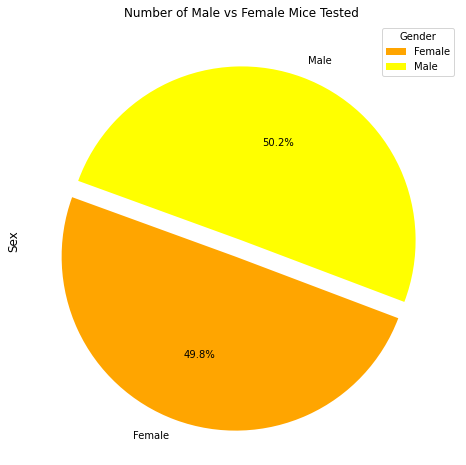

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#For this block of code we are first defining our colors and how much room should the gap be from one
# another when plotting the pie chart.
colors = ['orange','yellow']
explode = [0.1,0]
# Using gender as our dataframe reference we want to plot it in a pie chart. Having our y axis be the 
# 'Total Count' column within the dataframe. Configuring our figure size, color, explosion measurements
# starangle being the rotation of our pie chart, and autopct=%1.1f%% formatting our number to a percentage
# %1.1f is saying to format the number in one decimal place as a float with %% being the percentage 
# symbole at the end
plot = gender.plot.pie(y='Total Count', figsize=(8,8), colors=colors, startangle=160, explode=explode, autopct='%1.1f%%')

plt.title('Number of Male vs Female Mice Tested')
plt.ylabel('Sex',fontsize=12)
plt.legend(title='Gender',loc='best')

plt.show()
plt.savefig('/users/menard/desktop/Pymaceuticals-Challenge/Images/Number Of Male vs Female Mice Tested Pandas.png', bbox_incehs='tight')

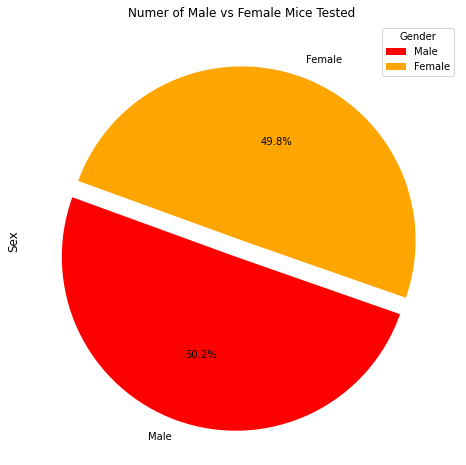

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# The only difference in platting it with pyplot is we have to define our variables.
# ONE KEY THING TO NOTE HERE is that to be sure to index match, if male goes first then put the male
# number first in popsize and so on.
labels = ['Male','Female']
popsize = [50.200803,49.799197]
colors = ['red','orange']
explode = (0.1,0)
# Similar to the code prior, we don't want to overwrite the prior pie chart, therefore we have to use
# subplots to create a new chart.
fig2, chart2 = plt.subplots(figsize=(8,8))
# For matplotlib, you just need to plug things in compared to pandas you need to define what the y axis
# will show. Everything is equal to the words because we have defined it earlier within this block
# od code.
plt.pie(popsize, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=160)
plt.title('Numer of Male vs Female Mice Tested')
plt.ylabel('Sex',fontsize=12)

plt.legend(title='Gender',loc='best')


plt.show()
plt.savefig('/users/menard/desktop/Pymaceuticals-Challenge/Images/Number Of Male vs Female Mice Tested PyPlot.png', bbox_incehs='tight')

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
# To begin,we must first group the data nby column. To do this, we will referece the orginal merged dataframe since most of the
# information is there. We will group 'Drug Regumen' and 'Mouse ID'. We are using the the '.last()' method because there are
# iterations within the dataset that repeats the same Mouse ID per drug. The tumor count will contain the last observation of
# each mouse that recieved each of the drugs. 
# NOTE THAT THE '.last()' METHOD IS NOT TOWARDS 'Drug Regimen' and 'Mouse ID' rather 'Timepoint' and 'Tumor Volume (mm3)'

tumorcount = data.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint','Tumor Volume (mm3)']]
# To make plotting easier, we will reset the index to be unique to the grouped index vs the original
tumordf = tumorcount.reset_index()

# In order to calculate the final tumor volume we must first state our main drugs that were used within the study. 
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Next, we will create a placeholder for the tumor volume values for each of the drugs. By doing this we can loop through each
# dataset and do some configurations on the 'Tumor Volume' data for our desired drug within the list.
tumorlist = []

# Now for our loop, the code below is saying. We will loop through each drug within the 'drugs' data and retrieving the tumor
# Volume for each drug within the 'tumordf' dataframe.
# In simpler terms. If the drug loop matches one of the drugs within our drug list, then retrieve the tumor volume.
for drug in drugs:
    tumorcount = tumordf.loc[tumordf['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    # If we get a match we then want to place that retrieved data into our list.
    tumorlist.append(tumorcount)
    # For analysis we will create our quantiles for each time the drug appears within the loop.
    quartiles = tumorcount.quantile([0.25,0.5,0.75])
    tumorlowquart = quartiles[0.25]
    tumorupquart = quartiles[0.75]
    tumoriqr = tumorupquart - tumorlowquart
    # Remember that the lower we want to subtract because we want that extra gap to capture data that fall outside of the 
    # normal measure of tendency. The same concept also applies to the higher bound.
    mean = tumorcount.mean()
    tumorlow = tumorlowquart - (1.5*tumoriqr)
    tumorhigh = tumorupquart + (1.5*tumoriqr)
    # Once the quartiles are defined we can now identify the outliers. The code below is going to identify any outliers within
    # the tumor volume data. In this case values that are less than than the lower bound or high than the upper bound.
    outliers = tumorcount.loc[(tumorcount < tumorlow) | (tumorcount > tumorhigh)]
    # Lastly, we then want to input all the information into a string by using f-string codes. The print below is basically going
    # to print each drug's statistical data as it loops through each row per drug. 
    print(f"{drug} Regimen")
    print(f"The tumor volume for {drug} below {round(tumorlow,2)} are outliers.")
    print(f"The tumor volume for {drug} above {round(tumorhigh,2)} are outliers.")
    print(f"The Average tumor volume for {drug} is: {round(mean,2)}")
    # NOTE that we are hardcoding capomulin rather than inputting the '{drug}' syntax because it is the drug we are interested in
    # looking at per set loop of each drug.
    print(f"Number of outliers for Capomulin is {outliers.count()}")
    # We are going to do another loop for outliers to check if there are any outliers within the tumorcount (per drug as a whole)
    # If there are outliers, the code then loops through each outlier value, retrieves the value and rounds it by 2 decimal 
    # places. The dashes is for each iteration complete it will separate by '-------------------------'
    # If there are outliers present it will then print the individual tumor volume values for each outlier.
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlying tumor volume is {round(outliers[i],2)}')
    print('-------------------------------------------------------------')

Capomulin Regimen
The tumor volume for Capomulin below 20.7 are outliers.
The tumor volume for Capomulin above 51.83 are outliers.
The Average tumor volume for Capomulin is: 36.67
Number of outliers for Capomulin is 0
-------------------------------------------------------------
Ramicane Regimen
The tumor volume for Ramicane below 17.91 are outliers.
The tumor volume for Ramicane above 54.31 are outliers.
The Average tumor volume for Ramicane is: 36.19
Number of outliers for Capomulin is 0
-------------------------------------------------------------
Infubinol Regimen
The tumor volume for Infubinol below 36.83 are outliers.
The tumor volume for Infubinol above 82.74 are outliers.
The Average tumor volume for Infubinol is: 58.18
Number of outliers for Capomulin is 1
Outlying tumor volume is 36.32
-------------------------------------------------------------
Ceftamin Regimen
The tumor volume for Ceftamin below 25.36 are outliers.
The tumor volume for Ceftamin above 87.67 are outliers.
Th

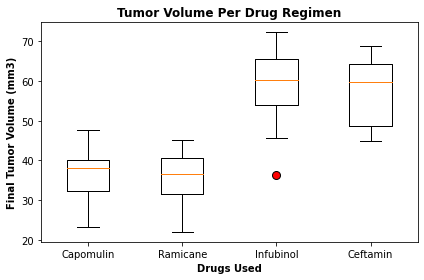

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig3, chart3 = plt.subplots()
chart3.boxplot(tumorlist, labels=drugs, flierprops={'markerfacecolor':'r','markersize':8})

chart3.set_title('Tumor Volume Per Drug Regimen',fontweight='bold')
chart3.set_xlabel('Drugs Used', fontweight='bold')
chart3.set_ylabel('Final Tumor Volume (mm3)',fontweight='bold')

plt.tight_layout()
plt.show()

plt.savefig('/users/menard/desktop/Pymaceuticals-Challenge/Images/Tumor Volume Per Drug Regimen.png', bbox_incehs='tight')

## Line and Scatter Plots

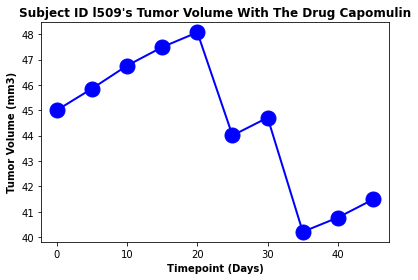

<Figure size 432x288 with 0 Axes>

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

subject = cleaned.loc[cleaned['Mouse ID'] == 'l509',:]
x = subject['Timepoint']
y = subject['Tumor Volume (mm3)']

fig4, chart4 = plt.subplots()
plt.title(f"Subject ID l509's Tumor Volume With The Drug Capomulin", fontweight='bold')
plt.plot(x,y, linewidth=2, markersize=15, marker ='o', color='blue')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

plt.tight_layout()
plt.show()

plt.savefig('/users/menard/desktop/Pymaceuticals-Challenge/Images/Individual Mouse Tumor Volume.png', bbox_incehs='tight')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

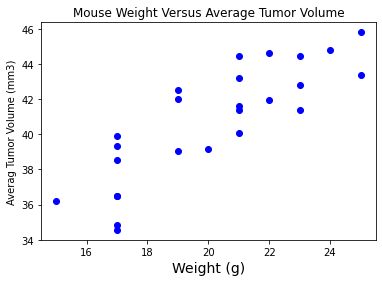

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots()
capomulindrug = data.loc[data['Drug Regimen'] == 'Capomulin']
avgcap =capomulindrug.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avgcap['Weight (g)'],avgcap['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

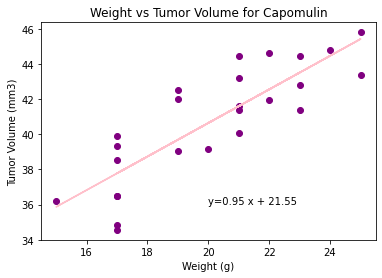

The correlation between mouse weight and the average tumor volume is 0.84


In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

fig6, chart6 = plt.subplots()
(slope, intercept, r, p, stde) = st.linregress(avgcap['Weight (g)'],avgcap['Tumor Volume (mm3)'])
r = avgcap['Weight (g)']*slope + intercept
line = f"y={round(slope,2)} x + {round(intercept,2)}"

plt.scatter(avgcap["Weight (g)"],avgcap["Tumor Volume (mm3)"],color='purple')
plt.plot(avgcap["Weight (g)"], r, color='pink')
plt.annotate(line,(20,36), fontsize=10)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")

plt.show()

correlation = st.pearsonr(avgcap['Weight (g)'],avgcap['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")